In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data_url = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
df = pd.read_csv(data_url)

## Part (a): Random Sampling and Glucose Comparison


In [ ]:
# Set a seed for reproducibility
np.random.seed(123)

# Draw a random sample of 25 patients
sample_25 = df.sample(25)
sample_25.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
236,7,181,84,21,192,35.9,0.586,51,1
395,2,127,58,24,275,27.7,1.600,25,0
36,11,138,76,0,0,33.2,0.420,35,0
210,2,81,60,22,0,27.7,0.290,25,0
483,0,84,82,31,125,38.2,0.233,23,0


In [ ]:
# Calculate Glucose statistics
glucose_stats = {
    'Population Mean': df['Glucose'].mean(),
    'Sample Mean': sample_25['Glucose'].mean(),
    'Population Max': df['Glucose'].max(),
    'Sample Max': sample_25['Glucose'].max()
}

<ipython-input-4-dcbf1839e437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(glucose_stats.keys()), y=list(glucose_stats.values()), palette='coolwarm')


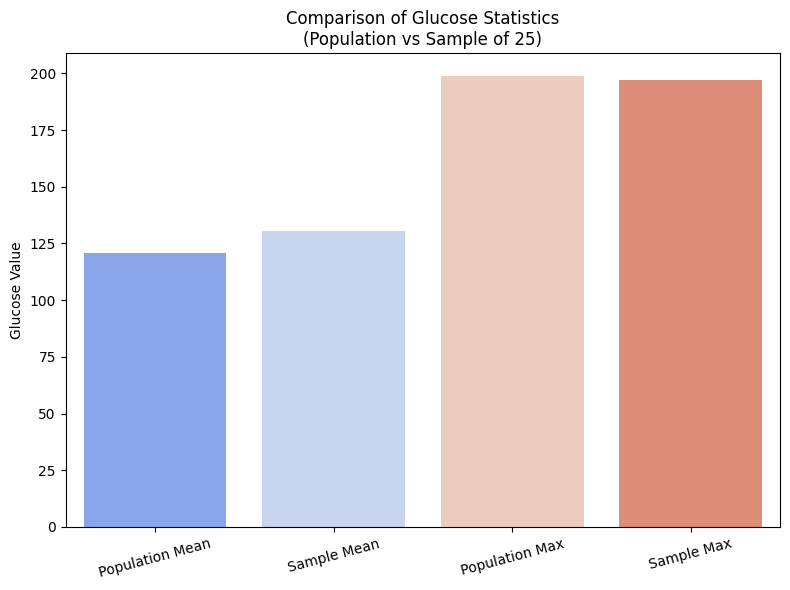

In [ ]:
# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=list(glucose_stats.keys()), y=list(glucose_stats.values()), palette='coolwarm')
plt.title('Comparison of Glucose Statistics\n(Population vs Sample of 25)')
plt.ylabel('Glucose Value')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Part (b): 98th Percentile of BMI



<ipython-input-5-d19dcd17f5e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Population BMI (98%)', 'Sample BMI (98%)'],


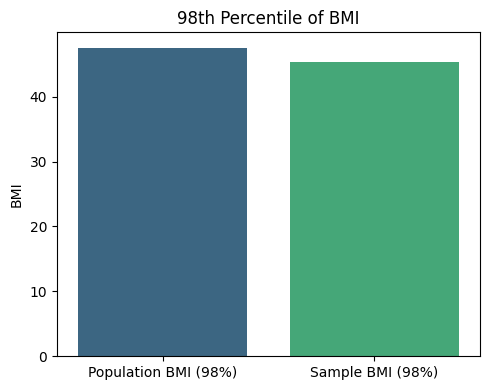

In [ ]:
# Compute 98th percentiles
bmi_98_population = np.percentile(df['BMI'], 98)
bmi_98_sample = np.percentile(sample_25['BMI'], 98)

# Visualize
plt.figure(figsize=(5,4))
sns.barplot(x=['Population BMI (98%)', 'Sample BMI (98%)'],
            y=[bmi_98_population, bmi_98_sample],
            palette='viridis')
plt.title('98th Percentile of BMI')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()

## Part (c): Bootstrap Sampling for Blood Pressure

In [ ]:
boot_means = []
boot_stds = []
boot_percentiles = []

# Generate 500 bootstrap samples
for _ in range(500):
    boot = df.sample(n=150, replace=True)
    bp = boot['BloodPressure']
    boot_means.append(bp.mean())
    boot_stds.append(bp.std())
    boot_percentiles.append(np.percentile(bp, 98))

In [ ]:
# Calculate bootstrap summary stats
bp_boot_summary = {
    'Mean': np.mean(boot_means),
    'Std Dev': np.mean(boot_stds),
    '98th Percentile': np.mean(boot_percentiles)
}
bp_boot_summary

{'Mean': np.float64(69.15464),
 'Std Dev': np.float64(19.204871569984963),
 '98th Percentile': np.float64(98.02348000000003)}

In [ ]:
# Population stats
bp_pop_summary = {
    'Mean': df['BloodPressure'].mean(),
    'Std Dev': df['BloodPressure'].std(),
    '98th Percentile': np.percentile(df['BloodPressure'], 98)
}
bp_pop_summary

{'Mean': np.float64(69.10546875),
 'Std Dev': 19.355807170644777,
 '98th Percentile': np.float64(99.31999999999994)}

In [ ]:
# Combine for plotting
df_compare = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', '98th Percentile'],
    'Population': list(bp_pop_summary.values()),
    'Bootstrap Avg': list(bp_boot_summary.values())
})
df_compare

,Statistic,Population,Bootstrap Avg
0,Mean,69.105469,69.154640
1,Std Dev,19.355807,19.204872
2,98th Percentile,99.320000,98.023480


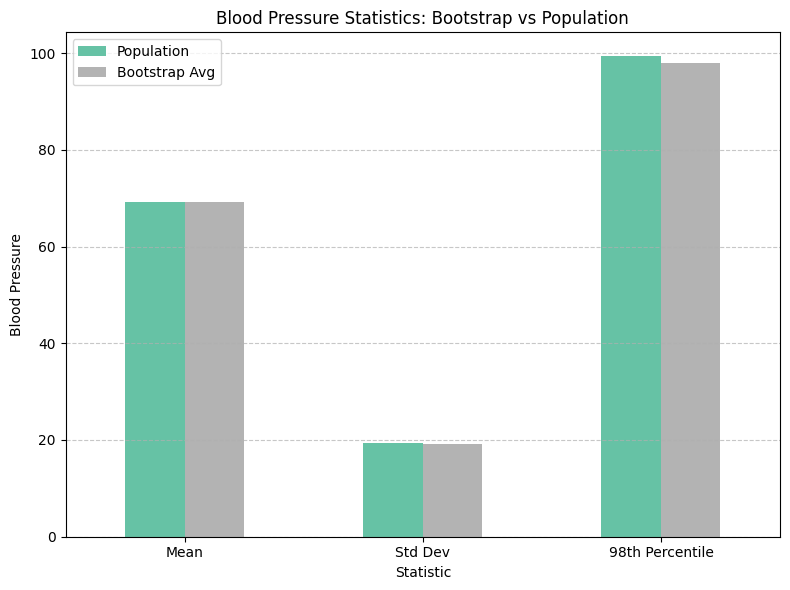

In [ ]:
# Plot comparison
df_compare.set_index('Statistic').plot(kind='bar', figsize=(8,6), colormap='Set2')
plt.title('Blood Pressure Statistics: Bootstrap vs Population')
plt.ylabel('Blood Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()